In [1]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import plotly.express as px
!pip install xgboost

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset_small.csv to dataset_small.csv


In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
dataset = pd.read_csv('dataset_small.csv')
df = pd.DataFrame(dataset)

In [5]:
dataset.head(10)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.334573,0,8560,4927,185,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,32,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,1.326223,-1,263283,8217,-1,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,3.969207,1,26496,258,106,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,25,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.495212,1,20013,2602,319,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.177876,-1,41828,-1,-1,1,2,1,389,1,1,0,0,0,1
5,1,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,17,0,0,0,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.245817,1,20013,4930,182,1,2,1,14379,0,1,0,0,0,1
6,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,32,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,14,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.167157,0,12301,6344,-1,1,2,1,1762,1,0,0,0,0,1
7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,29,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,29,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1

In [6]:
dataset.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.0,58645.0,58645.0,58645.000000,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,2.284338,0.457123,0.171285,1.937522,0.014102,0.311177,0.033456,0.212959,0.004451,0.001535,0.004877,0.003274,0.004212,0.006855,0.000767,0.002865,0.162503,1.068429,44.959297,1.799540,0.133294,0.000290,0.0,0.0,0.0,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.440992,18.073016,0.003427,0.003530,0.022338,-0.033814,-0.210947,1.590383,-0.298525,-0.287049,-0.293409,-0.291704,-0.296070,-0.297331,-0.293733,-0.297451,-0.296905,-0.292932,-0.298525,-0.296547,-0.219200,16.923932,-0.045750,-0.211084,-0.260466,-0.298525,-0.298525,-0.296035,-0.298082,-0.296377,-0.296956,-0.297877,-0.298082,-0.297672,-0.297366,-0.296752,-0.298525,-0.298525,-0.242305,4.659067,-0.714451,-0.816506,-0.791781,-0.83

In [7]:
dataset.isnull().sum()

qty_dot_url                   0
qty_hyphen_url                0
qty_underline_url             0
qty_slash_url                 0
qty_questionmark_url          0
qty_equal_url                 0
qty_at_url                    0
qty_and_url                   0
qty_exclamation_url           0
qty_space_url                 0
qty_tilde_url                 0
qty_comma_url                 0
qty_plus_url                  0
qty_asterisk_url              0
qty_hashtag_url               0
qty_dollar_url                0
qty_percent_url               0
qty_tld_url                   0
length_url                    0
qty_dot_domain                0
qty_hyphen_domain             0
qty_underline_domain          0
qty_slash_domain              0
qty_questionmark_domain       0
qty_equal_domain              0
qty_at_domain                 0
qty_and_domain                0
qty_exclamation_domain        0
qty_space_domain              0
qty_tilde_domain              0
qty_comma_domain              0
qty_plus

Total phishing URL 30647
Total legit URL 27998


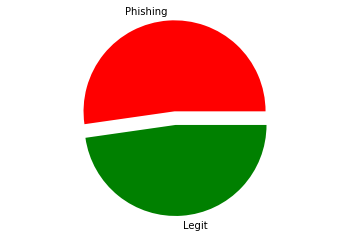

In [8]:
from matplotlib import style

phishing = (dataset['phishing'] == 1).sum() 

legit = (dataset['phishing'] == 0).sum()
print(f"Total phishing URL",phishing)
print(f"Total legit URL",legit)
p = [phishing, legit]
plt.pie(p,
       labels = ['Phishing', 'Legit'], 
       colors = ['red', 'green'],  
       explode = (0.15, 0),
       startangle = 0) 
plt.axis('equal') 
plt.show()


In [9]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(dataset)
var_thres.get_support()
constant_columns = [column for column in dataset.columns
                    if column not in dataset.columns[var_thres.get_support()]]
print(f"No of columns with 0 variance: {len(constant_columns)}")
constant_columns

No of columns with 0 variance: 13


['qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain']

In [10]:
dataset = dataset.drop(constant_columns,axis=1)
dataset.shape

(58645, 99)

In [11]:
#length of dataset before dropping duplicate rows
lengthbeforedropping=len(dataset)
lengthbeforedropping

58645

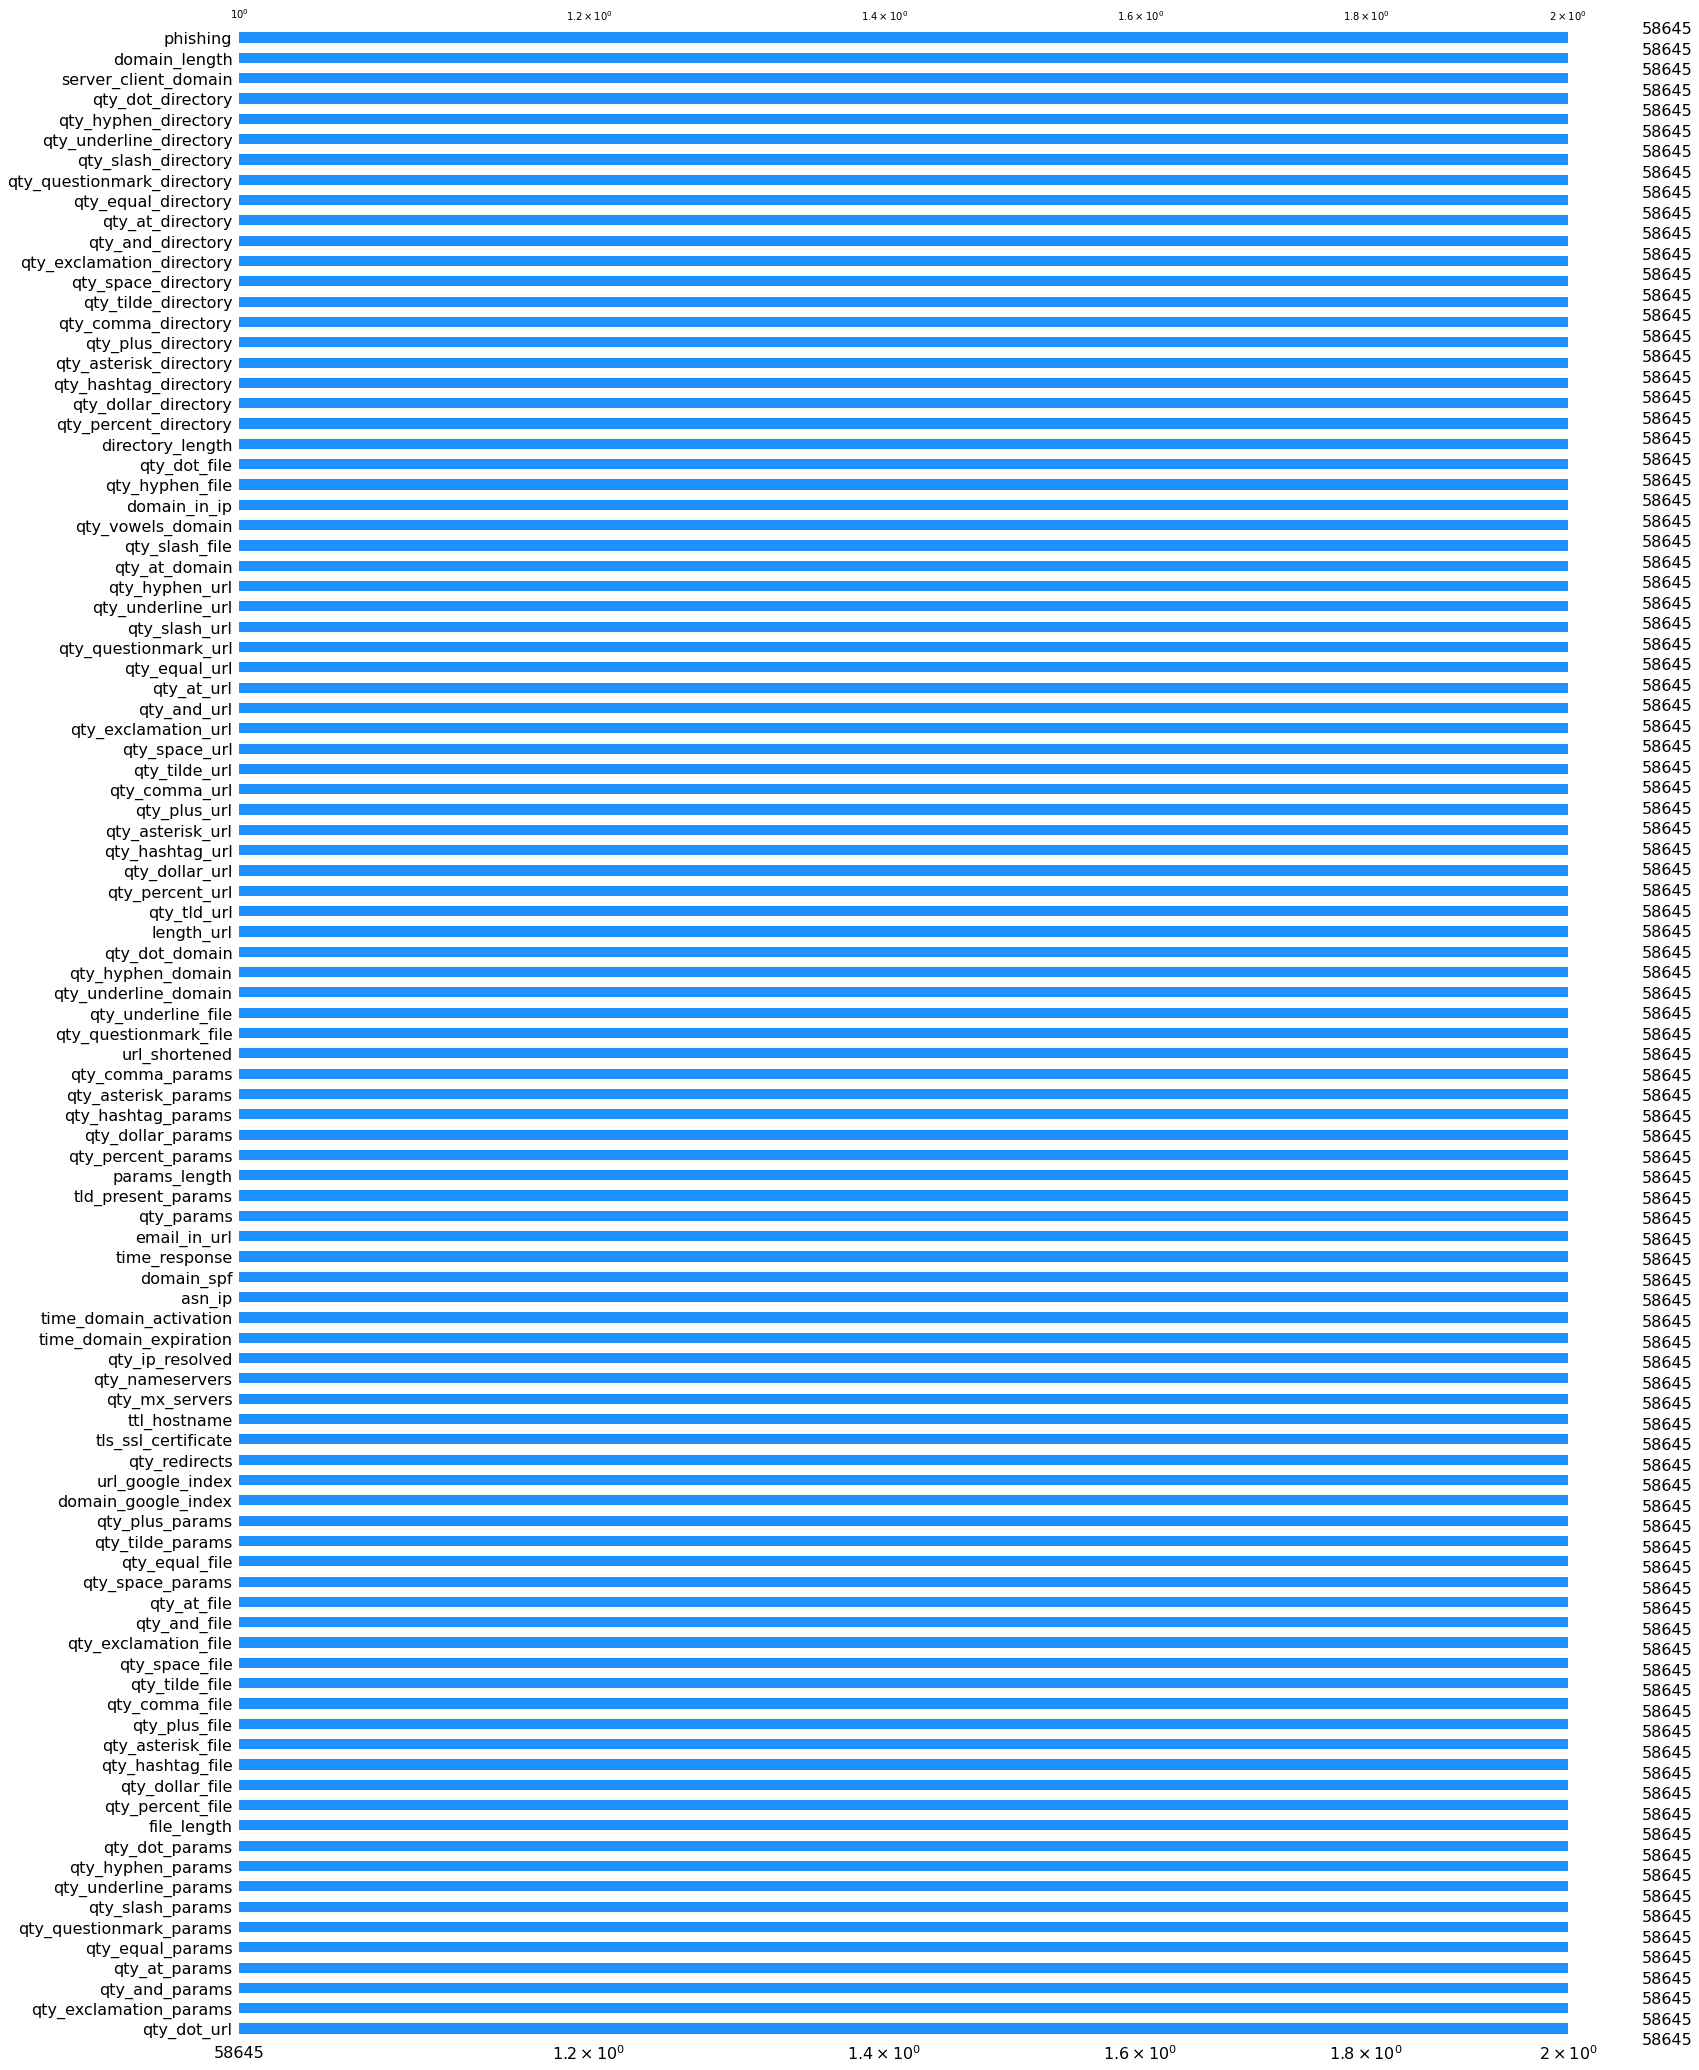

In [12]:
# plotting count of values per columns ignoring missing values for dataset
msno.bar(dataset,color='dodgerblue', sort='ascending',log=True)

In [13]:
#length of dataset after dropping duplicate rows

dataset.drop_duplicates(keep=False,inplace=True)
lengthafterdropping=len(dataset)
lengthafterdropping

56992

In [14]:
#Duplicate Rows
duplicaterows=lengthbeforedropping-lengthafterdropping
duplicaterows

1653

In [15]:
#Replacing the value -1 with Nan and then deleting those rows

#Finding rows which contain the value -1
dataset.isin(['-1']).count()

qty_dot_url                   56992
qty_hyphen_url                56992
qty_underline_url             56992
qty_slash_url                 56992
qty_questionmark_url          56992
qty_equal_url                 56992
qty_at_url                    56992
qty_and_url                   56992
qty_exclamation_url           56992
qty_space_url                 56992
qty_tilde_url                 56992
qty_comma_url                 56992
qty_plus_url                  56992
qty_asterisk_url              56992
qty_hashtag_url               56992
qty_dollar_url                56992
qty_percent_url               56992
qty_tld_url                   56992
length_url                    56992
qty_dot_domain                56992
qty_hyphen_domain             56992
qty_underline_domain          56992
qty_at_domain                 56992
qty_vowels_domain             56992
domain_length                 56992
domain_in_ip                  56992
server_client_domain          56992
qty_dot_directory           

In [16]:
#All the rows have the value -1 in atleast one of the columns, so lets remove the rows which have the maximum number of -1

In [17]:
# Data distribution of the features
cols={} 
for i in dataset.columns:
    print("- - - - - New Column Here- - - - - - - ")
    x=dataset[i].value_counts(normalize=True)
    print(x)
    if dataset[i].isin([-1]).any():
        cols[i]=x[-1] 

Streaming output truncated to the last 5000 lines.
 7723     0.000018
 5317     0.000018
 9864     0.000018
 10905    0.000018
 1458     0.000018
 13851    0.000018
 3991     0.000018
 9232     0.000018
 7546     0.000018
 6002     0.000018
 21326    0.000018
 8280     0.000018
 12436    0.000018
 14013    0.000018
 6876     0.000018
 13315    0.000018
 11810    0.000018
 4829     0.000018
 12222    0.000018
 15396    0.000018
 11689    0.000018
 9002     0.000018
 13990    0.000018
 8796     0.000018
 2154     0.000018
 2693     0.000018
 1404     0.000018
 40000    0.000018
 9064     0.000018
 2817     0.000018
 2156     0.000018
 15898    0.000018
 7680     0.000018
 5241     0.000018
 15493    0.000018
 3420     0.000018
 11189    0.000018
 14750    0.000018
 7217     0.000018
 12626    0.000018
 13698    0.000018
 16296    0.000018
 339      0.000018
 2599     0.000018
 9084     0.000018
 13359    0.000018
 2908     0.000018
 14953    0.000018
 9324     0.000018
 12664    0.000018